<font color="darkblue"> Prática 01: Naive Bayes </font>

**Objetivos:**

*   Implementar o algortimo de NaiveBayes;
*   Analisar seu desempenho com um banco de dados real de emails. 


**Requisitos de execução:**


*   Upload do arquivo *spam.txt*

**Atividade 1:**

1. Banco de email rotulados disponível em:  https://spamassassin.apache.org/old/publiccorpus/ (a base de dados foi adaptada para um arquivo único contendo apenas o assunto dos emails)
2. Carregar os dados do arquivo *spma.txt* nos dados de entrada do algoritmo de aprendizado.

    

In [ ]:
def load_emails(filename):
    X = []
    y = []
    with open(filename, 'r', errors='ignore') as file:
            for line in file:
                pos = line.rfind(':')
                X.append(line[:pos])

                label = line[pos+1:].strip()
                y.append(+1 if (label == "True") else -1)

    return X,y
                    
X, y = load_emails("spam.txt")
for x, _y in zip(X, y):
    print(x + " : " + str(_y))

**Atividade 2:**

1. Implementar um separador de palavras das mensagens (tokenize)


In [2]:
import re

def tokenize(message):
    message = message.lower() #minusculo
    all_words = re.findall("[a-z0-9']+", message) #separa as palavras
    return set(all_words) #remove repeticao

print(X[10])
print(tokenize(X[10]))


Re: New Sequences Window 
{'window', 'new', 'sequences', 're'}


**Atividade 3:**

1. Implementar um contador que contabiliza o número de vezes que cada palavra das mensagens de entrada apareceu como *spam* ou não *spam*.

In [ ]:
from collections import defaultdict
from matplotlib import pyplot as plt

def count_words(X, y):
    ##dicionario formado por [word][(spam_count, non_spam_count)]
    counts = defaultdict(lambda: [0,0])
    for message, is_spam in zip(X, y):
        for word in tokenize(message):
            counts[word][0 if is_spam == +1 else 1] += 1
    return counts


counts = count_words(X, y)

for word , count in counts.items():
    if(count[1] > 0):
      print(word + " - " + str(count))

**Atividade 4:**

1. Plotar num grafico de barras as palavras que mais aparecem como *spam* e não *spam*.

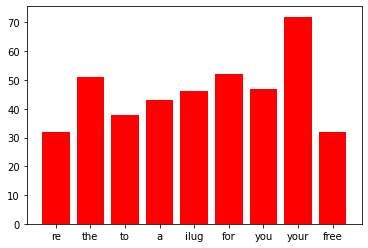

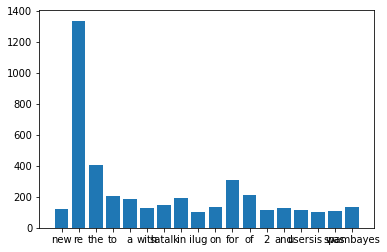

In [4]:
spam_w = []
spam_c = []
no_spam_w = []
no_spam_c = []
for word , count in counts.items():
    if count[0] >= 30 : # testa quantidade de spam
        spam_w.append(word)
        spam_c.append(count[0])
    if count[1] >= 100 : # testa quantidade de não spam
        no_spam_w.append(word)
        no_spam_c.append(count[1])

plt.bar(spam_w, spam_c, color='r')
plt.show()
plt.bar(no_spam_w, no_spam_c)
plt.show()

**Atividade 5:**

1. Contabilizar as probabilidades de cada palavra ser de mensagem *spam* ou nao *spam*



```
Fórmulas:
```


*   $P(word | spam) = \frac{\#word_{spam}+k}{total_{spam}+2k}$
*   $P(word | \text{~}spam) = \frac{\#word_{no\_spam}+k}{total_{no\_spam}+2k}$


Obs: Uso do $k$ evita que haja probabilidade ZERO;

In [7]:

def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    ##tripla: word, P(word | spam), P(word | ~spam)
    return [(word,
             (spam+k) / (total_spams + 2*k),
             (non_spam+k) / (total_non_spams + 2*k))
            for word, (spam, non_spam) in counts.items()]


num_spams = 0
num_non_spams = 0

for is_spam in y:
    if is_spam == +1:
        num_spams += 1
    else:
        num_non_spams += 1

probabilities = word_probabilities(counts, num_spams, num_non_spams)

for word , p_spam, p_no_spam in probabilities:
    print('P('+word+'|spam)=' + str(p_spam) + ' - ' +'P('+word+'|~spam)=' + str(p_no_spam))

P(window|spam)=0.000992063492063492 - P(window|~spam)=0.01078397808969531
P(new|spam)=0.026785714285714284 - P(new|~spam)=0.040568298527901406
P(sequences|spam)=0.000992063492063492 - P(sequences|~spam)=0.00907223553577542
P(re|spam)=0.06448412698412699 - P(re|~spam)=0.45720643615200274
P(zzzzteana|spam)=0.000992063492063492 - P(zzzzteana|~spam)=0.03029784320438206
P(alexander|spam)=0.000992063492063492 - P(alexander|~spam)=0.0005135227661759672
P(moscow|spam)=0.000992063492063492 - P(moscow|~spam)=0.0005135227661759672
P(bomber|spam)=0.000992063492063492 - P(bomber|~spam)=0.0005135227661759672
P(klez|spam)=0.000992063492063492 - P(klez|~spam)=0.0005135227661759672
P(won't|spam)=0.002976190476190476 - P(won't|~spam)=0.0005135227661759672
P(irr|spam)=0.000992063492063492 - P(irr|~spam)=0.0018829168093118796
P(that|spam)=0.000992063492063492 - P(that|~spam)=0.007702841492639507
P(die|spam)=0.000992063492063492 - P(die|~spam)=0.0015405682985279014
P(the|spam)=0.10218253968253968 - P(the|~

**Atividade 6:**

1. Plotar em um grafico de barras as palavras com maior probabilidade de serem *spam* ou não *spam*.

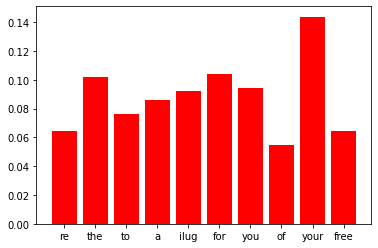

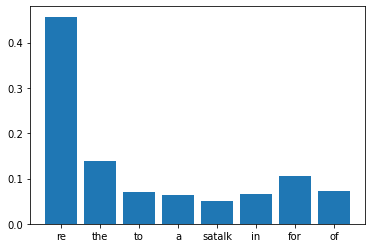

In [6]:
spam_w = []
spam_p = []
no_spam_w = []
no_spam_p = []
for word , p_spam, p_no_spam in probabilities:
    if p_spam >= 0.05:
        spam_w.append(word)
        spam_p.append(p_spam)
    if p_no_spam >= 0.05 :
        no_spam_w.append(word)
        no_spam_p.append(p_no_spam)

plt.bar(spam_w, spam_p, color='r')
plt.show()
plt.bar(no_spam_w, no_spam_p)
plt.show()

**Atividade 7:**

1. Criar uma interface iterativa para configurar os parâmetros da *DecisionTreeClassifier*
2. Analisar o resultado produzido pelos parâmtros em termos de $E_{in}$ e $E_{out}$ 



```
Fórmulas:
```


*   $P(X|spam)=e^{\sum_{w \in X}P(w|spam)}$
*   $P(X|\text{~}spam)=e^{\sum_{w \in X}P(w|\text{~}spam)}$

*   $P(spam|X)=\frac{P(X|spam) \times P(spam)}{P(X|spam) \times P(spam) + P(X|\text{~}spam) \times P(\text{~}spam)}$
*   $P(\text{~}spam|X)=\frac{P(X|\text{~}spam) \times P(\text{~}spam)}{P(X|\text{~}spam) \times P(\text{~}spam) + P(X|spam) \times P(spam)}$










In [8]:
import math

def message_probability(word_probs, message):
    message_words = tokenize(message)
    log_prob_if_spam = log_prob_if_not_spam = 0.0

          
    #itera as palavras do vocabulario e suas probabilidades
    for word, prob_if_spam, prob_if_not_spam in word_probs:
        
        #se a palavra esta na message adicione o log da probabilidade de ve-lo
        if word in message_words:
            log_prob_if_spam += math.log(prob_if_spam)
            log_prob_if_not_spam += math.log(prob_if_not_spam) 
        
        #se word nao esta na message, adicione o log da probabilidade de nao ve-lo
        #que eh (1-probabilidade de ve-lo)
        #else:
            #log_prob_if_spam += math.log(1 - prob_if_spam)
            #log_prob_if_not_spam += math.log(1 - prob_if_not_spam)

    return math.exp(log_prob_if_spam), math.exp(log_prob_if_not_spam)

def spam_probability(word_probs, message, priori_spam, priori_no_spam):
    prob_if_spam, prob_if_not_spam = message_probability(word_probs, message)
    
    return prob_if_spam*priori_spam/(prob_if_spam*priori_spam + prob_if_not_spam*priori_no_spam)

def no_spam_probability(word_probs, message, priori_spam, priori_no_spam):
    prob_if_spam, prob_if_not_spam = message_probability(word_probs, message)
    
    return prob_if_not_spam*priori_no_spam/(prob_if_spam*priori_no_spam + prob_if_not_spam*priori_spam)


for i in range(10):
    p_spam = spam_probability(probabilities, X[i], 0.5, 0.5)
    print(p_spam)

0.0009359138997504279
0.008842815069110348
0.10889683822998562
0.6193891420254793
0.012953082301289475
0.023565769785514747
0.023565769785514747
0.1868608935590699
0.023565769785514747
0.10889683822998562


**Atividade 8:**

1. Implementar o algoritmo NaiveBayes;
2. Implementar o método *fit* computando: probabilidades a priori do vocabulário de treino;
3. Implementar o o método *predict*: que utiliza o Teorema de Bayes para classificar o dados novos.

In [ ]:
class NaiveBayesClassifier:

    def __init__(self, k=0.5):
        

    def fit(self, x_train, y_train):
        #contabiliza a probabilidade a priori das messagens serem spams e não spams
        

        #Contabiliza a probabilidade a priori de cada palavra ser spam ou não spam
        
        
    def predict(self, message):
        

**Atividade 9:**

1. Separar os dados em treino e teste;
2. Utilizar a classe *NaiveBayesClassifier* para ajustar com os dados de treino e predizer com dados de teste;
3. Computar métricas de aprendizado.

In [ ]:
from sklearn.model_selection import train_test_split
